In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
%matplotlib inline

# Univariate Visualizations
- Visualizations of single variables.
- By looking at one variable at a time, we can build an intuition for how each variable is distributed before moving on to more complex interactions between variables.


- The main plot types for univariate visualizations:
    - Bar charts
    - Histograms

## Bar charts

- The primary visualization for choice for representing the distribution of a **qualitative** variable.
- In a bar chart, each level of the categorical variable is depicted by a bar, whose height indicate the frequency of data points that take on that level.
- To avoid information distortion, the **baseline** for the plot should start at **zero**. Otherwise, height differences between bars could look bigger than they actually are.

##### sb.countplot function
    parameters
        1. x, y, hue : names of variables in data or vector data
        2. data : DataFrame, array, or list of arrays
        3. order, hue_order : lists of strings
            Order to plot the categorical levels in
        4. orient : “v” | “h”
            Orientation of the plot (vertical or horizontal)
        5. color
        6. palette : palette name, list, or dict
            Colors to use for the different levels of the hue variable
        7. saturation
        8. ax : matplotlib Axes
            Axes object to draw the plot onto

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [3]:
pokemon.shape

(807, 14)

In [4]:
pd.value_counts(pokemon['generation_id'], sort = False)

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: generation_id, dtype: int64

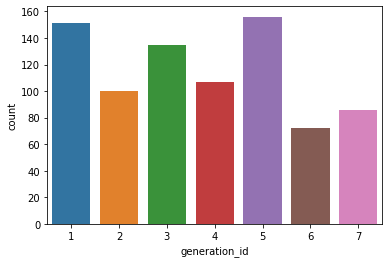

In [5]:
sb.countplot(data = pokemon, x = 'generation_id');
#The semicolon ";" suppresses the printing of the plotting object information

- By default, each level of the categorical variable is given a different color.

In [6]:
#This function returns a list of RGB tuples (3-tuple) corresponding to the color palette set in the function's arguments
#Each tuple consists of three digits specifying the Red, Green, and Blue channel values to specify a color
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
print(sb.color_palette())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


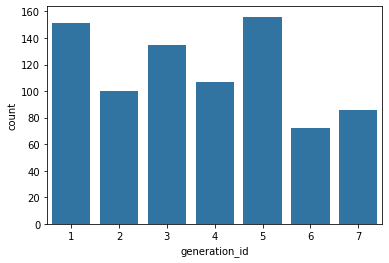

In [14]:
#Changing the color of the bars using the color parameter
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

For nominal data, you might want to arrange the bars in order of frequency with the most common on the left.

In [15]:
gen_order = pd.value_counts(pokemon.generation_id).index

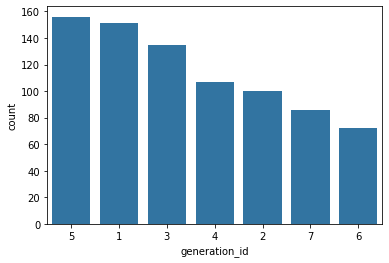

In [16]:
#The "order" parameter takes as an argument a list with the order in which bars should be plotted
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

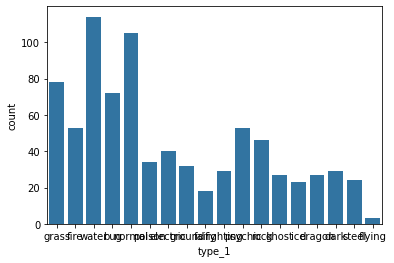

In [17]:
#The bar labels on the x axis are mostly unreadable due to overlap
sb.countplot(data = pokemon, x = 'type_1', color = base_color);

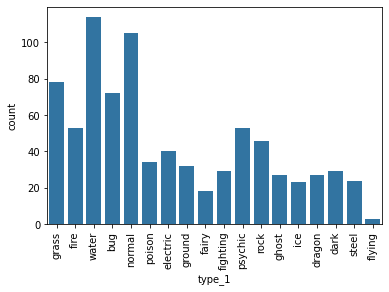

In [18]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color)
plt.xticks(rotation = 90);

- One common variation for bar chars is the horizontal bar chart. 
- In this variation, the chart is essentially turned 90 degrees clockwise.
- If you have a lot of categories, or the category names are long, then the horizontal orientation can be more convenient in terms of the space needed to create a readable plot.

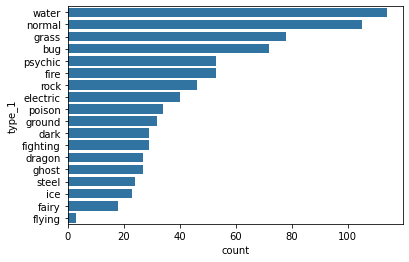

In [19]:
#horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

- For ordinal data types, the inherent order of the levels is a more important feature to convey.
- It is more important to know if the most common categories are lower or higher in the spectrum.
- By converting the data into an ordered categorical data type, the order of categories becomes innate to the feature, and we won't need to specify an order parameter each time it's required in a plot.

In [20]:
levels = ['Alpha', 'Beta', 'Gamma', 'Delta']
level = [random.choice(levels) for i in range(1000)]
df = pd.DataFrame({'id': range(1000), 'level':level})
df.head()

,id,level
0,0,Gamma
1,1,Beta
2,2,Gamma
3,3,Beta
4,4,Alpha


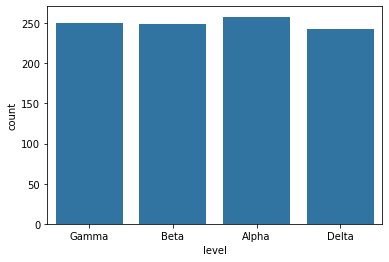

In [21]:
sb.countplot(data = df, x = 'level', color = base_color);

- By default, Pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen.

In [22]:
#Convert the level data from an object data type into an ordered categorical data type
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.api.types.CategoricalDtype(categories = level_order, ordered = True)
df['level'] = df['level'].astype(ordered_cat)

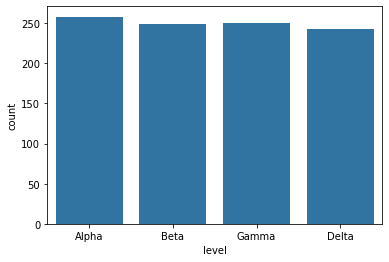

In [23]:
sb.countplot(data = df, x = 'level', color = base_color);

If your data is a pandas Series, 1-d array, or a list, you can set it as the first argument to the countplot function.

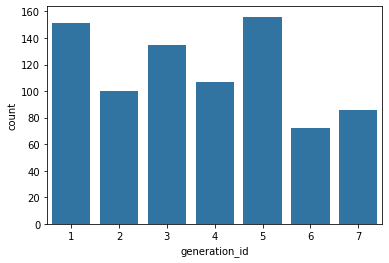

In [26]:
sb.countplot(x = pokemon['generation_id'], color = base_color);
#The same as ....> sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

### Absolute vs. Relative Frequency

- Absolute frequency: number of data points on the length axis.
- Relative frequency: the proportion of the data that falls in each category.
- Changing the count axis to relative proportions makes it much easier to see how much each category contributes to the whole.

In [27]:
pkmn_types = pd.melt(pokemon, id_vars = ['id', 'species'], value_vars = ['type_1', 'type_2'], 
                    var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [28]:
type_counts = pd.value_counts(pkmn_types['type'])
type_order = type_counts.index

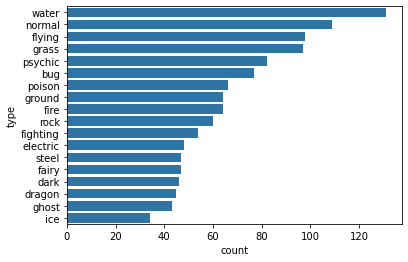

In [29]:
#By default, sb.countplot function will plot the data in terms of absolute frequency
sb.countplot(y = pkmn_types['type'], order = type_order, color = base_color);

In [30]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [31]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

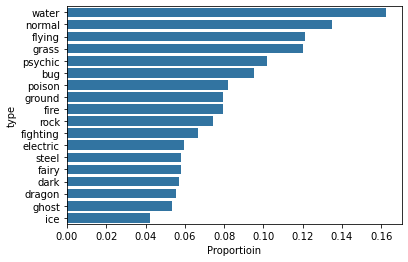

In [32]:
#Relative frequency: relabel the count axis in terms of proportions
sb.countplot(data = pkmn_types, y = 'type', order = type_order, color = base_color)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportioin');

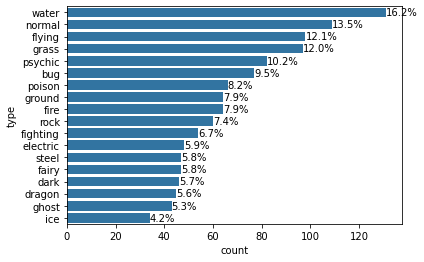

In [33]:
sb.countplot(data = pkmn_types, y = 'type', order = type_order, color = base_color)
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * (count / n_pokemon))
    plt.text(type_counts[i], i, pct_string, va = 'center')

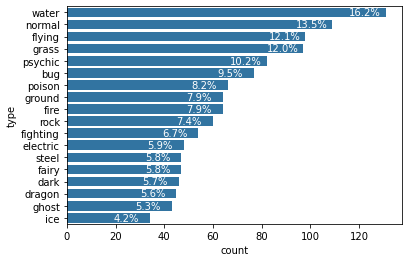

In [34]:
sb.countplot(data = pkmn_types, y = 'type', order = type_order, color = base_color)
locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count - 15, loc, pct_string, va = 'center', color = 'w')

**plt.yticks()** or **plt.xticks()** returns a 2-tuple containing an array of label positions as well as a silent list of label names.

### Counting Missing Data

In [35]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

In [36]:
pokemon.isna().any(axis = 0)

id                 False
species            False
generation_id      False
height             False
weight             False
base_experience    False
type_1             False
type_2              True
hp                 False
attack             False
defense            False
speed              False
special-attack     False
special-defense    False
dtype: bool

In [37]:
pokemon.isna().any(axis = 1).sum()

402

**sb.barplot** function can be used to depict a summary of one quantitative variable against levels of a second qualitative variable.

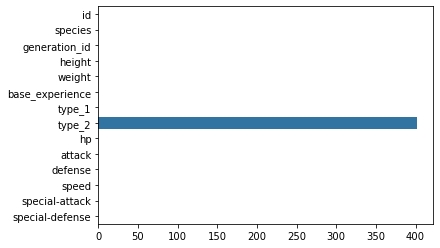

In [38]:
na_count = pokemon.isna().sum()
sb.barplot(x = na_count.values, y = na_count.index, color = base_color);

### Pie Charts

- Pie charts are used for plotting **relative frequencies** for levels of a qualitative variable.
- In a pie chart, each category is indicated by a slice of a circle, with the area of each slice idicating the relative frequency of that category.

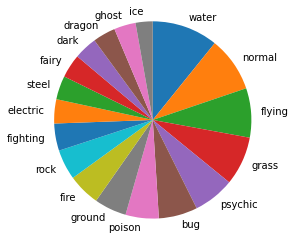

In [39]:
type_counts = pd.value_counts(pkmn_types.type)
plt.pie(type_counts, labels = type_counts.index, startangle = 90, counterclock = False)
plt.axis('square');

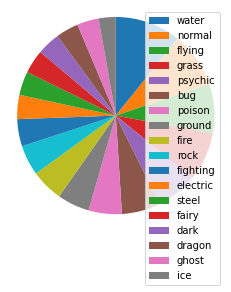

In [40]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90, counterclock = False,labeldistance = None)
plt.legend()
plt.axis('square');

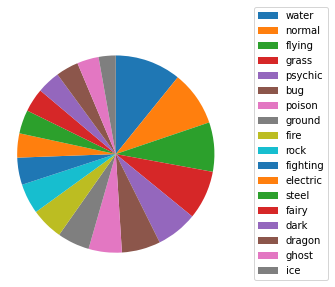

In [41]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90, counterclock = False, labeldistance = None)
#labeldistance: The radial distance at which pie labels are drawn.
#If labeldistance is set to None, labels are not drawn, but are stored for use in legend()
plt.legend(loc = 0, bbox_to_anchor = (1, 0.7, 0.5, 0.5))
plt.axis('square');

- A variant of the pie chart, the donut plot, is very similar except that the center of the circle has been removed.
- Some statistics might be reported in the hole of a donut plot to better make use of available space.

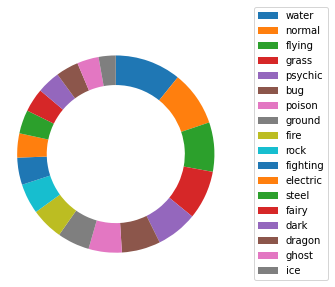

In [42]:
plt.pie(type_counts, labels = type_counts.index, labeldistance = None, startangle = 90, counterclock = False, 
       wedgeprops = {'width':0.3})
plt.legend(loc = 'best', bbox_to_anchor = (1, 0.7, 0.5, 0.5))
plt.axis('square');

- Pie charts and donut plots are fairly limited in the range of scenarios where they can be used and they are more difficult to read.
- It's very difficult to get an accurate estimate of relative frequency using pie or donut plots alone especially if there are a lot of categories.

#### Qualitative variable represntation
1. Bar charts
    - `sb.countplot`
        - Used for plotting both absolute and relative frequencies.
    - `sb.barplot`
        - Used to plot a quantitative variable against the levels of a second qualitative variables.
2. Pie charts (& donut plot)
    - `plt.pie`
        - Used for plotting relative frequencies for qualitative variables.
        - This function requires the data to be in a summarized form.

## Histograms

- Used for plotting **quantitative** variables.
- Due to the numeric nature of the data, bars in a histogram don't indicate counts on single values but instead count on value ranges.
- Values are grouped into continuous bins, and one bar for each bin is plotted depicting the number.
- Normally, bins include values on their left end, and exclude values on their right end, except for the rightmost bin edge.

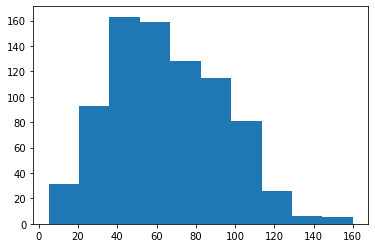

In [43]:
plt.hist(data = pokemon, x = 'speed');

The direct adjacency of the bars in a histogram emphasize the fact that the data takes on a continuous range of values.

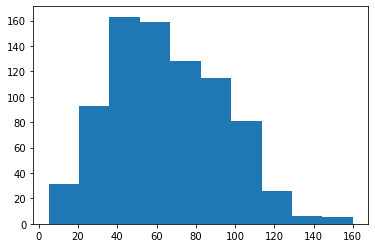

In [44]:
pokemon['speed'].hist(grid = False);
#or ---> pokemon['speed'].plot(kind = 'hist')

- By default, matplotlib will split the data into 10 bins which is usually too few to understand the distribution of the data.
- The number of bins can be changed through the **bins** parameter.
- bins : int or sequence or str, optional
- If bins is an integer, it defines the number of equal-width bins in the range. 
- If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin; in this case, bins may be unequally spaced. All but the last (righthand-most) bin is half-open. In other words, if bins is: 
[1, 2, 3, 4] then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

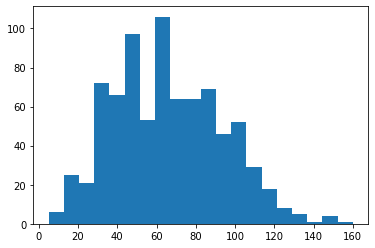

In [45]:
#higher number of bins reveals more details, but the bin boundaries are still awkward
#Some bins cover more integer values than others
plt.hist(data = pokemon, x = 'speed', bins = 20);

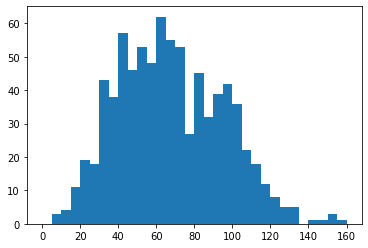

In [46]:
bins = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

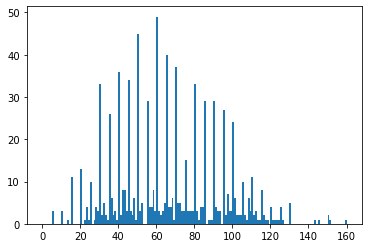

In [47]:
bins = np.arange(0, pokemon['speed'].max() + 1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins);

- If bin size is too large, then you may end up losing a lot of information about the overall distribution of data.
- On the opposite side, a too small bin size can introduce noise that can distract from the main trends in you data.

- Seaborn also has a function for creating histograms, **sb.distplot()**, which only takes as an argument the pandas Series containing all the data.

C:\Users\ayh17\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


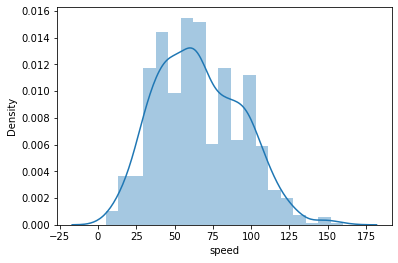

In [48]:
sb.distplot(pokemon['speed']);

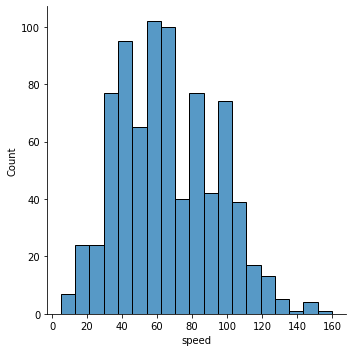

In [49]:
#figure-level function
sb.displot(pokemon['speed']);

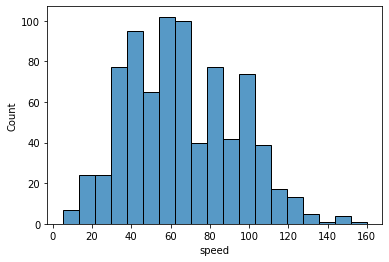

In [53]:
#axes-level function
sb.histplot(pokemon['speed']);

- In **sb.distplot()**, the dafault bin count is larger than in matplotlib (has a better bin-selection formula).
- A line has been plotted over the bars, and the y axis values are really small.
- The line is a density curve estimate of the data distribution, and the total area under the curve is set to be equal to 1.

C:\Users\ayh17\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


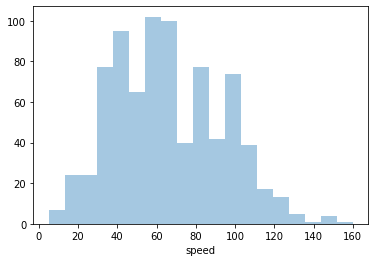

In [55]:
#Turn off the density curve
sb.distplot(pokemon['speed'], kde = False);

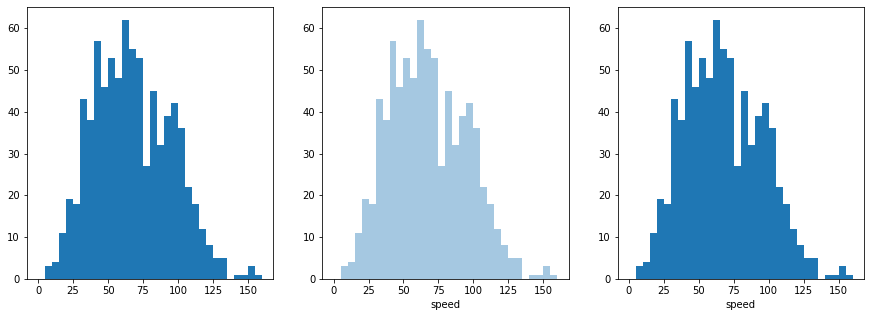

In [56]:
bin_edges = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)
plt.subplot(1,3,2)
sb.distplot(pokemon['speed'], kde = False, bins = bin_edges)
plt.subplot(1,3,3)
#Change the transparency of the plot
sb.distplot(pokemon['speed'], kde = False, hist_kws = {'alpha':1}, bins = bin_edges);


## Figures, Axes, and Subplots

- The base of a visualization in matplotlib is a **figure** object. Contained withing each figure object is one or more **axes** objects, each of which contains a number of other elements that represents each **plot**.
- We can explicitly set up the figure and axes objects.

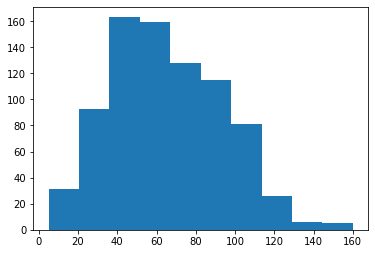

In [57]:
fig = plt.figure()
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.hist(data = pokemon, x = 'speed');

- **fig.add_axes([left, bottom, width, height])** requires a list of arguments specifying the dimensions of the axes. The first two elements of the list specify the position of the lower left hand corner of the axes. The other two elements specify the axes width and height in relation to the figure size, respectively.
- To use axes object with seaborn, seaborn function usually have an **ax** parameter to specify upon which axes a plot will be drawn.

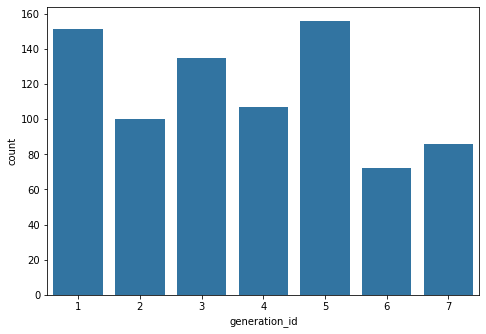

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sb.countplot(data = pokemon, x = 'generation_id', ax = ax, color = base_color);

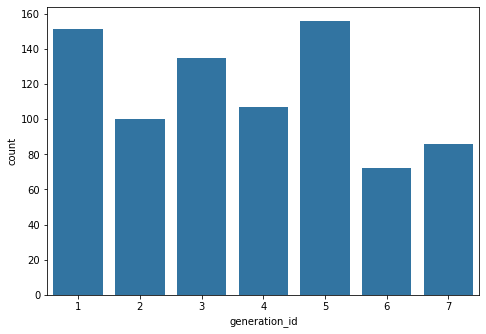

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sb.countplot(data = pokemon, x = 'generation_id', ax = ax, color = base_color);

- In the above  case, there was no purpose to go through the figure and axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a figure or axes, and they will **automatically use the most recent figure or axes worked with**.

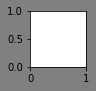

In [60]:
fig = plt.figure(facecolor = 'grey', figsize = (1,1))
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])

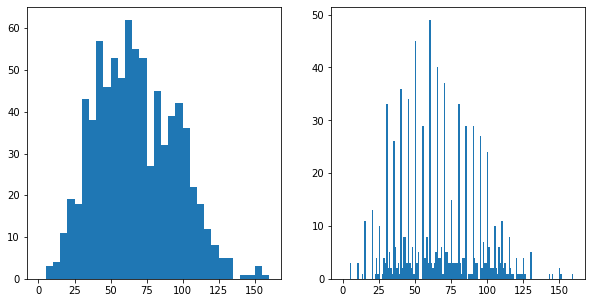

In [61]:
plt.figure(figsize = [10, 5])
'''Creates a new figure object without assigning any variable to return the function's output.
Matplotlib and seaborn functions use the most recent figure or axes objects worked with. So any further plotting calls that
need a figure object will refer to that figure as the active one'''

plt.subplot(1,2,1)
'''Creates a new axes in our figure. The first two arguments say to divide the figure into one row and two columns, and the
third argument says to create a new axes in the first slot.'''

bin_edges = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges, color = base_color);
plt.subplot(1,2,2)
bin_edges = np.arange(0, pokemon['speed'].max() + 1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges, color = base_color);

1. Get a list of all axes in a figure
    - `plt.get_axes()`
2. Retrieve the curret axes
    - `plt.gca()`
3. Set a particular axes as the active one
    - `plt.sca()`
4. Add an axes to a figure object
    - `fig.add_axes`
5. Add a subplot to a figure object
    - `fig.add_subplot`
    - `plt.subplot`
6. Create a new figure with a bunch of subplots
    - `fig, axes = plt.subplots(3,4, figsize = (15, 15))`
        Creates one figure object, and a grid of 3 x 4 grid of subplots (12 axes)
7. Alter the dimensions of a figure object after it has already been created
    - `fig.set_figwidth(10)`
    - `fig.set_figheight(10)`

##### `fig.add_axes()` vs `fig.add_subplot()`
https://stackoverflow.com/questions/43326680/what-are-the-differences-between-add-axes-and-add-subplot/43330553

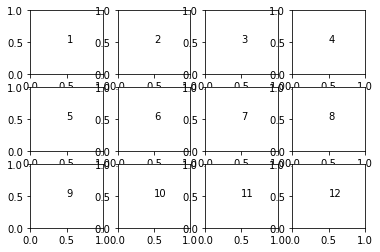

In [62]:
fig, axes = plt.subplots(3,4)
for i in range(len(fig.get_axes())):
    axes = axes.flatten()
    #flatten reshape the 3 x 4 array into a 12-element vector
    ax = plt.sca(axes[i])
    plt.text(0.5, 0.5, i + 1)

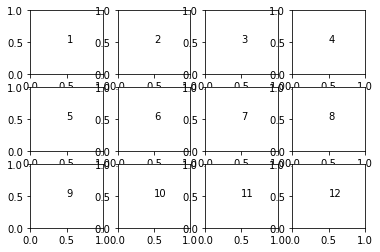

In [63]:
fig, axes = plt.subplots(3,4)
for i in range(len(fig.get_axes())):
    plt.sca(fig.get_axes()[i])
    plt.text(0.5, 0.5, i+1)

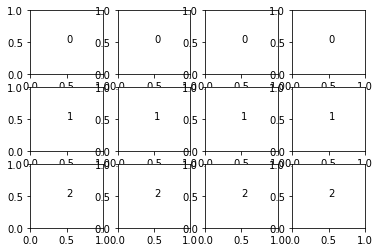

In [64]:
fig, axes = plt.subplots(3,4)
for i in [0, 1, 2]:
    for j in [0, 1, 2, 3]:
        ax = plt.sca(axes[i][j])
        plt.text(0.5, 0.5, i)

## Choosing a Plot for Discrete Data

- If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.
- The histogram is the most immediate choice since the data is numeric.

In [65]:
die_rolls = pd.Series(np.random.randint(1,13, size = 100))

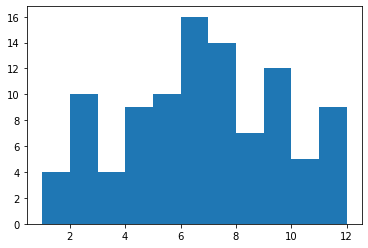

In [66]:
bin_edges = np.arange(1,12+1, 1)
plt.hist(die_rolls, bins = bin_edges);

- In the above plot, data equal to the rightmost bin edge gets lamped into the last bin.
- The values of 11 and 12 gets grouped together in the same bin, which may confuse the readers who try to interpret the plot.

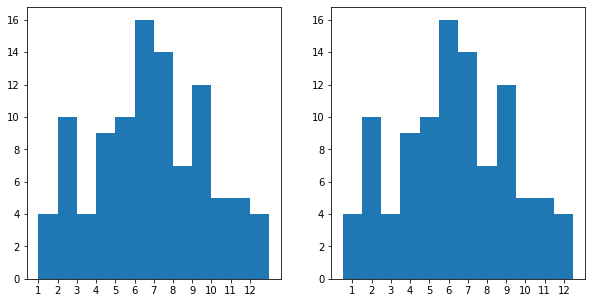

In [67]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
bin_edges = np.arange(1, 12 + 1.1, 1)
plt.xticks(np.arange(1,13,1))
plt.hist(die_rolls, bins = bin_edges)
plt.subplot(1,2,2)
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1,13, 1));

C:\Users\ayh17\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


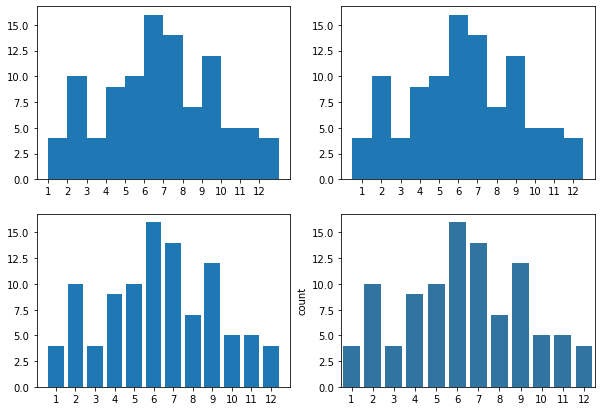

In [68]:
plt.figure(figsize = [10, 7])
plt.subplot(2,2,1)
bin_edges = np.arange(1, 12 + 1.1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1,12 + 1,1))
plt.subplot(2,2,2)
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1,12 + 1, 1))
plt.subplot(2,2,3)
in_edges = np.arange(0.5, 12.5 + 1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.8)
#rwidth: the width of the bar as a fraction of the bin width
plt.xticks(np.arange(1,12 + 1, 1))
plt.subplot(2,2,4)
sb.countplot(die_rolls, color = base_color);

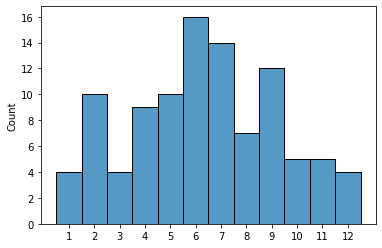

In [69]:
bin_edges = np.arange(1,13+1, 1)
sb.histplot(die_rolls, bins = bin_edges)
plt.xticks(np.arange(1.5,13.5,1), np.arange(1,13,1));

- By adding gaps between the bars, you emphasize the fact that the data is discrete in nature.
- For continuous numeric data, you shouldn't make use of the rwidth parameter since the gaps imply discreteness of values.
- Be careful about using **sb.countplot()** function to plot the distribution of a discrete numeric variable as bars, since each unique numeric value will get a bar regardless of the spacing between bars.
- If your data is discrete numeric, you shouldn't probably consider either of the above two variants unless the number of unique values is small enough to allow for the half unit shift or discrete bars to be interpretable.
- If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram.

## Descriptive Statistics, Outliers, and Axis Limits

- Visualizations gives you insights into the data that you can't get from descriptive statistics. It allows you to understand the data faster than the statistics would be able to allow.
- Plots can also highlight areas of the data where we need to perform further inspection.
- In a histogram, one of the most salient bits of information that you can observe is whether or not there are outliers in your data.
- If you have a highly skewed data, you might want to change the range of the data plotted in order to zoom into parts that are more interesting.
- You can change a histogram's axis limits through **plt.xlim()** function call. This function takes a tuple of two numbers specifying the upper and lower bounds of the x axis range.

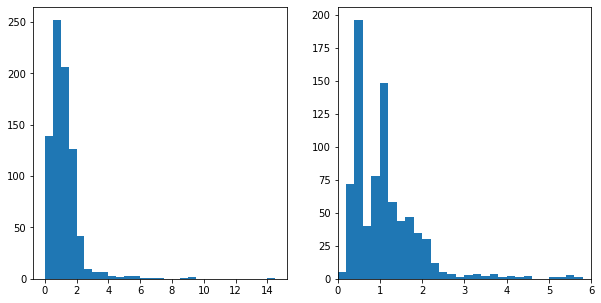

In [110]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
bin_edges = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)
plt.subplot(1,2,2)
bin_edges = np.arange(0, pokemon['height'].max()+ 0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)
plt.xlim((0, 6));


## Scales and Transformation

- In some cases, you might want to change the scale of the plot (e.g., from a linear scale to a logarithmic scale).
- The standard assumption is that your data should be interpreted linearly, with differences being the salinet points of attention. In other cases, you might be interested in differences in terms of ratios or percentages.
- The classic example of a variable that might require a different scale is data dealing with finanace.
- Variables like this tend to have a range of values that crosses many orders of magnitude, and are usually skewed to the right.

In [111]:
prices = pd.Series([4500, 7400, 8800, 9600, 11600, 12900, 14000, 19400, 25800, 26000, 27800, 35200, 41600, 43500, 56400,
                   57900, 72500, 85000, 140000, 198000])

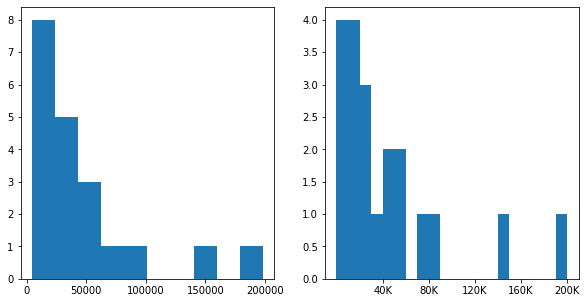

In [123]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.hist(prices)
plt.subplot(1,2,2)
bin_edges = np.arange(0, prices.max() + 10000, 10000)
plt.hist(prices, bins = bin_edges)
ticks = [40000, 80000, 120000, 160000, 200000]
plt.xticks(ticks, ['40K', '80K', '120K', '160K', '200K']);

- Using a linear scale resulted in an unevenly balanced plot with a lot of gaps in order to capture the highest values points.
- With a linear model in mind, it would be difficult for a predictor variable to capture small differences at the low end of the scale at the same time as large distances at the high end.

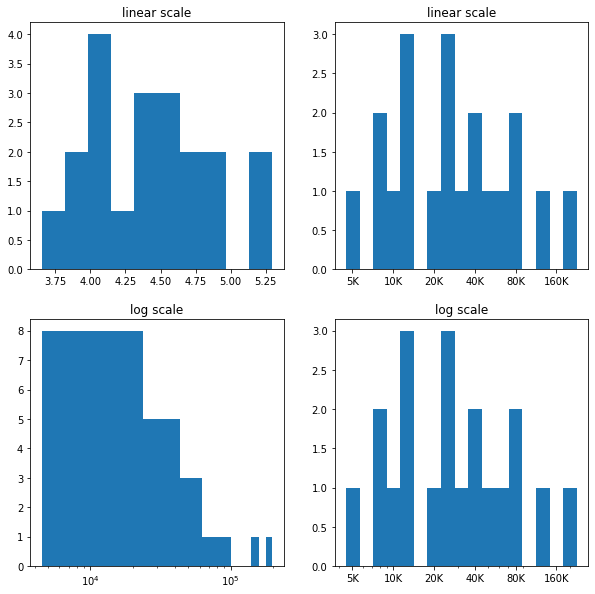

In [130]:
plt.figure(figsize = (10, 10))

plt.subplot(2,2,1)
log_prices = np.log10(prices)
plt.hist(log_prices)
plt.gca().set_title('linear scale')

plt.subplot(2,2,2)
minimum = log_prices.describe()['min']
maximum = log_prices.describe()['max']
bin_edges = np.arange(minimum, maximum + 0.1, 0.1)
plt.hist(log_prices, bins = bin_edges)
ticks = [5000, 10000, 20000, 40000, 80000, 160000]
tick_loc = [np.log10(i) for i in ticks]
plt.xticks(tick_loc, ['5K', '10K', '20K', '40K', '80K', '160K'])
plt.gca().set_title('linear scale')

plt.subplot(2,2,3)
plt.hist(prices)
plt.xscale('log')
plt.gca().set_title('log scale')

plt.subplot(2,2,4)
bin_edges = 10 ** np.arange(minimum, maximum + 0.1, 0.1)
plt.hist(prices, bins = bin_edges)
plt.xscale('log')
ticks = [5000, 10000, 20000, 40000, 80000, 160000]
plt.xticks(ticks, ['5K', '10K', '20K', '40K', '80K', '160K'])
plt.gca().set_title('log scale');

- When a logarithimic scaling is applied, the distances on the scaled axis represents multiplicative differences rather than arithmetic differences.
- All the values in a variable must be positive in order to use a log transform.

An alternative approach to axis transformation is to start by applying the transformation directly to the data. When we plot the transform data on a linear scale, we get the exact same picture as the original data plotted on a log scale. However, to interpret the values, we need to mentally apply the inverse transformation.

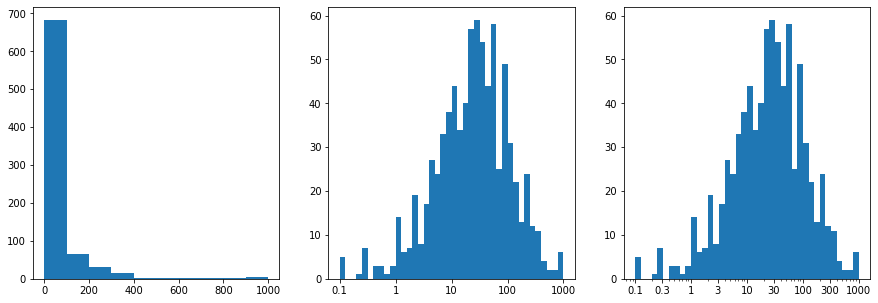

In [140]:
plt.figure(figsize = (15, 5))

plt.subplot(1,3,1)
plt.hist(data = pokemon, x = 'weight');

plt.subplot(1,3,2)
log_weight = np.log10(pokemon['weight'])
minimum = log_weight.describe()['min']
maximum = log_weight.describe()['max']
bin_edges = np.arange(minimum, maximum + 0.1, 0.1)
plt.hist(log_weight, bins = bin_edges)
tick_loc = [-1, 0, 1,  2,  3]
tick_labels = [10 ** x for x in tick_loc]
plt.xticks(tick_loc, tick_labels);

plt.subplot(1,3,3)
bin_edges = 10 ** np.arange(minimum, maximum + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges)
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ticks);

- One common distribution that results from the logarithmic distribution is the **log-normal** distribution.
- **Log-Normal distribution**: it is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.
- Under this distribution, linear changes in predictor features will result in multiplicative effects in the response.

- Axis Transformations are useful because they allow you to interpret your data with their naturally recordedd units.
- In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret them in the variable's natural units.

##### Additional Variation

- If you want to use a different transformation that is not available in xscale, then you'll have to perform some feature engineering.
- You will need to write a function that applies both the transformation and its inverse.
- The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back.

###### Applying the log transformation using a function instead

In [151]:
def log_transform(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return 10 ** x

In [152]:
minimum = log_transform(pokemon['weight']).describe()['min']
maximum = log_transform(pokemon['weight']).describe()['max']

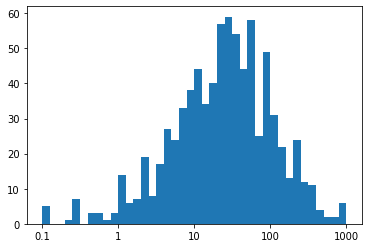

In [156]:
bin_edges = np.arange(minimum, maximum + 0.1, 0.1)
plt.hist(log_transform(pokemon['weight']), bins = bin_edges)
tick_loc = [-1, 0, 1,  2,  3]
plt.xticks(tick_loc, [log_transform(i, inverse = True) for i in tick_loc]);

In [164]:
areas = np.abs(50 * np.random.randn(200) + 100)

In [165]:
adds = [300, 350, 400, 425, 800, 900, 1000, 1100, 980, 755,357,880,987,863,430,340,1050,1000,900,600,700,600]
areas = pd.Series(np.append(areas, adds))

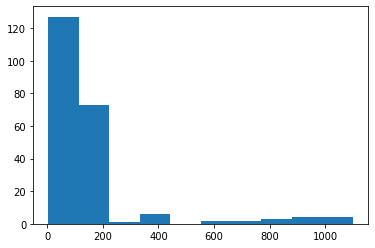

In [166]:
plt.hist(areas);

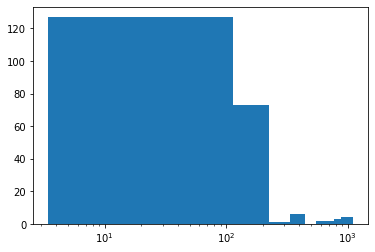

In [167]:
plt.hist(areas)
plt.xscale('log');

###### Logarithmic scale

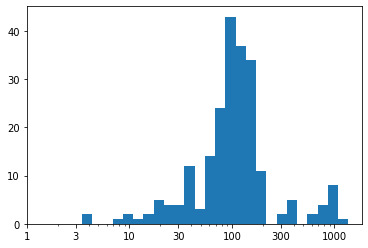

In [168]:
mi = np.log10(areas.describe())['min']
ma = np.log10(areas.describe())['max']
bin_edges = 10 ** np.arange(mi, ma + 0.1, 0.1)
plt.hist(areas, bins = bin_edges)
plt.xscale('log')
ticks = [1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ticks);

In [169]:
def sqrt_trans(data, inverse = False):
    if not inverse:
        return np.sqrt(data)
    else:
        return data ** 2

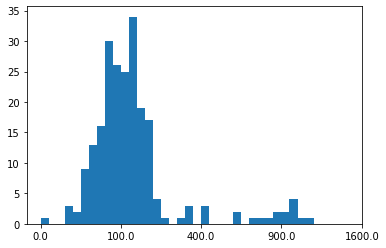

In [163]:
bin_edges = np.arange(0, sqrt_trans(areas.max()) + 1, 1)
plt.hist(areas.map(sqrt_trans), bins = bin_edges)
ticks = np.arange(0, sqrt_trans(areas.max()) + 10, 10)
plt.xticks(ticks, sqrt_trans(ticks, inverse = True));